In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('VIC.csv')

data

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0


In [24]:
data = data[['Date/Time', 'Close']]
data

,Date/Time,Close
0,10/17/2018 9:39,98.5
1,10/17/2018 9:40,98.5
2,10/17/2018 9:41,98.6
3,10/17/2018 9:42,98.6
4,10/17/2018 9:43,98.7
...,...,...
101261,12/22/2020 14:22,105.7
101262,12/22/2020 14:23,105.7
101263,12/22/2020 14:24,105.7
101264,12/22/2020 14:25,105.7


In [25]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

/tmp/ipykernel_67792/4152136917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date/Time'] = pd.to_datetime(data['Date/Time'])


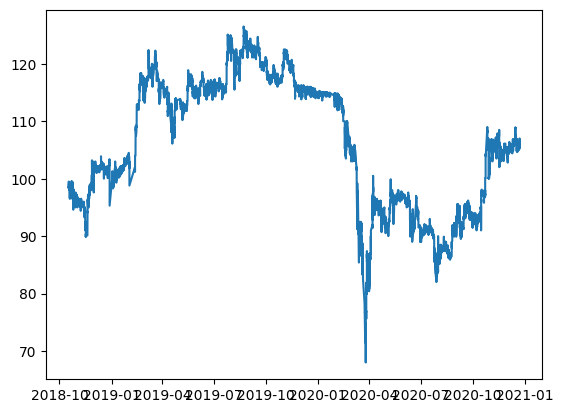

In [26]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.plot(data['Date/Time'], data['Close'])

In [27]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('Date/Time', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 30
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),...,Close(t-21),Close(t-22),Close(t-23),Close(t-24),Close(t-25),Close(t-26),Close(t-27),Close(t-28),Close(t-29),Close(t-30)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-10-17 10:11:00,99.1,99.0,99.0,99.0,99.5,98.9,98.9,98.8,99.5,99.2,...,98.8,98.8,98.7,98.8,98.7,98.7,98.6,98.6,98.5,98.5
2018-10-17 10:12:00,99.3,99.1,99.0,99.0,99.0,99.5,98.9,98.9,98.8,99.5,...,98.7,98.8,98.8,98.7,98.8,98.7,98.7,98.6,98.6,98.5
2018-10-17 10:13:00,99.4,99.3,99.1,99.0,99.0,99.0,99.5,98.9,98.9,98.8,...,98.6,98.7,98.8,98.8,98.7,98.8,98.7,98.7,98.6,98.6
2018-10-17 10:14:00,99.2,99.4,99.3,99.1,99.0,99.0,99.0,99.5,98.9,98.9,...,98.6,98.6,98.7,98.8,98.8,98.7,98.8,98.7,98.7,98.6
2018-10-17 10:15:00,99.2,99.2,99.4,99.3,99.1,99.0,99.0,99.0,99.5,98.9,...,98.6,98.6,98.6,98.7,98.8,98.8,98.7,98.8,98.7,98.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22 14:22:00,105.7,105.8,105.8,105.8,105.8,105.8,105.8,105.9,105.9,105.9,...,106.0,106.0,105.9,105.9,106.0,106.0,106.0,106.0,106.0,105.9
2020-12-22 14:23:00,105.7,105.7,105.8,105.8,105.8,105.8,105.8,105.8,105.9,105.9,...,105.9,106.0,106.0,105.9,105.9,106.0,106.0,106.0,106.0,106.0
2020-12-22 14:24:00,105.7,105.7,105.7,105.8,105.8,105.8,105.8,105.8,105.8,105.9,...,105.9,105.9,106.0,106.0,105.9,105.9,106.0,106.0,106.0,106.0


In [28]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[ 99.1,  99. ,  99. , ...,  98.6,  98.5,  98.5],
       [ 99.3,  99.1,  99. , ...,  98.6,  98.6,  98.5],
       [ 99.4,  99.3,  99.1, ...,  98.7,  98.6,  98.6],
       ...,
       [105.7, 105.7, 105.7, ..., 106. , 106. , 106. ],
       [105.7, 105.7, 105.7, ..., 106. , 106. , 106. ],
       [105.7, 105.7, 105.7, ..., 105.9, 106. , 106. ]])

In [29]:
shifted_df_as_np.shape

(101236, 31)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[0.06324786, 0.05982906, 0.05982906, ..., 0.04615385, 0.04273504,
        0.04273504],
       [0.07008547, 0.06324786, 0.05982906, ..., 0.04615385, 0.04615385,
        0.04273504],
       [0.07350427, 0.07008547, 0.06324786, ..., 0.04957265, 0.04615385,
        0.04615385],
       ...,
       [0.28888889, 0.28888889, 0.28888889, ..., 0.2991453 , 0.2991453 ,
        0.2991453 ],
       [0.28888889, 0.28888889, 0.28888889, ..., 0.2991453 , 0.2991453 ,
        0.2991453 ],
       [0.28888889, 0.28888889, 0.28888889, ..., 0.2957265 , 0.2991453 ,
        0.2991453 ]])

In [31]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((101236, 30), (101236,))

In [32]:
X = dc(np.flip(X, axis=1))
X

array([[0.04273504, 0.04273504, 0.04615385, ..., 0.05982906, 0.05982906,
        0.05982906],
       [0.04273504, 0.04615385, 0.04615385, ..., 0.05982906, 0.05982906,
        0.06324786],
       [0.04615385, 0.04615385, 0.04957265, ..., 0.05982906, 0.06324786,
        0.07008547],
       ...,
       [0.2991453 , 0.2991453 , 0.2991453 , ..., 0.29230769, 0.28888889,
        0.28888889],
       [0.2991453 , 0.2991453 , 0.2991453 , ..., 0.28888889, 0.28888889,
        0.28888889],
       [0.2991453 , 0.2991453 , 0.2957265 , ..., 0.28888889, 0.28888889,
        0.28888889]])

In [33]:
split_index = int(len(X) * 0.95)

split_index

96174

In [34]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96174, 30), (5062, 30), (96174,), (5062,))

In [35]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96174, 30, 1), (5062, 30, 1), (96174, 1), (5062, 1))

In [36]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([96174, 30, 1]),
 torch.Size([5062, 30, 1]),
 torch.Size([96174, 1]),
 torch.Size([5062, 1]))

In [37]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [38]:
train_dataset

In [39]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [40]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 30, 1]) torch.Size([16, 1])


In [41]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [42]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [43]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [44]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.156
Batch 200, Loss: 0.065
Batch 300, Loss: 0.016
Batch 400, Loss: 0.009
Batch 500, Loss: 0.004
Batch 600, Loss: 0.002
Batch 700, Loss: 0.001
Batch 800, Loss: 0.001
Batch 900, Loss: 0.001
Batch 1000, Loss: 0.001
Batch 1100, Loss: 0.000
Batch 1200, Loss: 0.001
Batch 1300, Loss: 0.000
Batch 1400, Loss: 0.000
Batch 1500, Loss: 0.000
Batch 1600, Loss: 0.000
Batch 1700, Loss: 0.000
Batch 1800, Loss: 0.000
Batch 1900, Loss: 0.000
Batch 2000, Loss: 0.000
Batch 2100, Loss: 0.000
Batch 2200, Loss: 0.000
Batch 2300, Loss: 0.000
Batch 2400, Loss: 0.000
Batch 2500, Loss: 0.000
Batch 2600, Loss: 0.000
Batch 2700, Loss: 0.000
Batch 2800, Loss: 0.000
Batch 2900, Loss: 0.000
Batch 3000, Loss: 0.000
Batch 3100, Loss: 0.000
Batch 3200, Loss: 0.000
Batch 3300, Loss: 0.000
Batch 3400, Loss: 0.000
Batch 3500, Loss: 0.000
Batch 3600, Loss: 0.000
Batch 3700, Loss: 0.000
Batch 3800, Loss: 0.000
Batch 3900, Loss: 0.000
Batch 4000, Loss: 0.000
Batch 4100, Loss: 0.000
Batch 4200, Loss

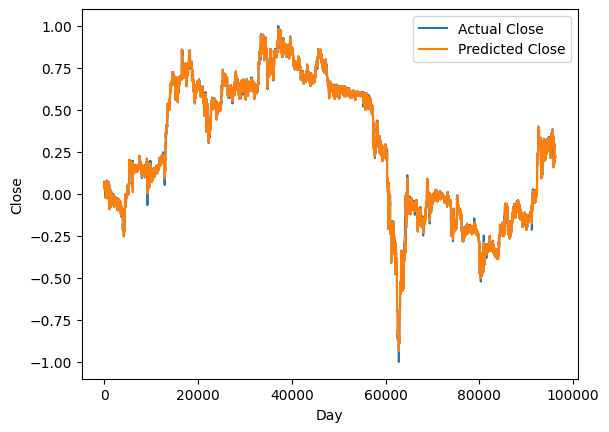

In [45]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [46]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 98.95267106,  99.01655164,  99.18246702, ..., 103.46940756,
       103.64512715, 103.70938366])

In [47]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 99.10000011,  99.3000001 ,  99.40000009, ..., 103.80000005,
       103.80000005, 103.90000004])

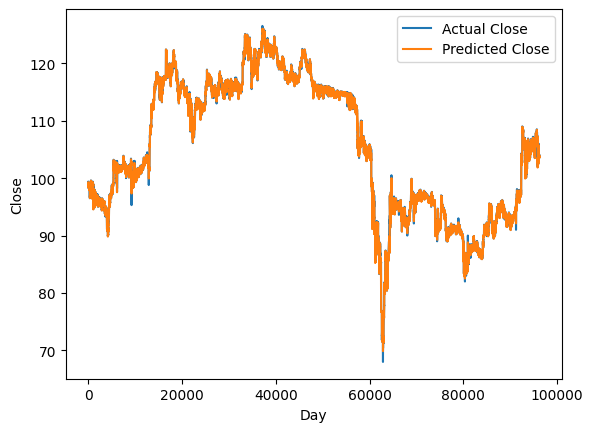

In [48]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [49]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([103.80246352, 103.83367364, 103.55899009, ..., 105.63614877,
       105.62898587, 105.62782125])

In [50]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([103.90000004, 103.50000006, 103.20000008, ..., 105.70000037,
       105.70000037, 105.70000037])

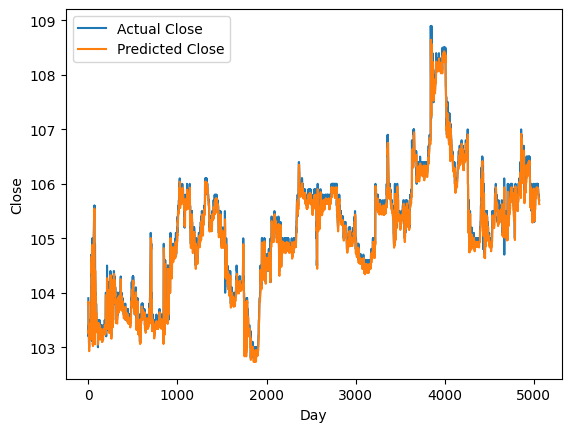

In [51]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
